### Load and Prepare Data

Throughout this section we work the MRT train network as our underlying graph. The MRT stations mark the nodes, and there is an edge (directed or undirected; see below) if there is a direct train connection between the respective MRT stations.

**Load data from files.** We first load the information about the MRT stations. We only need this information to have access to the latitude and longitude of the stations, so we can plot the MRT graph and preserve the relative geographic locations of the MRT stations.

In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import networkx as nx
from src.utils import plot_mrt_graph

In [6]:
df_mrt_stations = pd.read_csv('data/a3-mrt-stations.csv')
df_mrt_stations.head()

code line            name  opening_year        subzone  latitude   longitude
0  cc1   cc     dhoby ghaut          2010    dhoby ghaut  1.298912  103.846293
1  cc2   cc      bras basah          2010     bras basah  1.296862  103.850667
2  cc3   cc       esplanade          2010      city hall  1.293658  103.855081
3  cc4   cc       promenade          2010  marina centre  1.293998  103.860350
4  cc5   cc  nicoll highway          2010         nicoll  1.299767  103.863637

The following file contains the main information: Which MRT stations are directly connected with by a train. Note that the file contains each connection twice for both directions.

In [7]:
df_mrt = pd.read_csv('data/a3-mrt-connections.csv')
df_mrt.head()

from             to
0  tanjong pagar  raffles place
1      mayflower    bright hill
2     macpherson         mattar
3         rochor   little india
4     kent ridge      one-north

### Create Graphs

In [8]:
G_undirected = nx.Graph()
for idx, row in df_mrt.iterrows():
    G_undirected.add_edge(row['to'], row['from'])

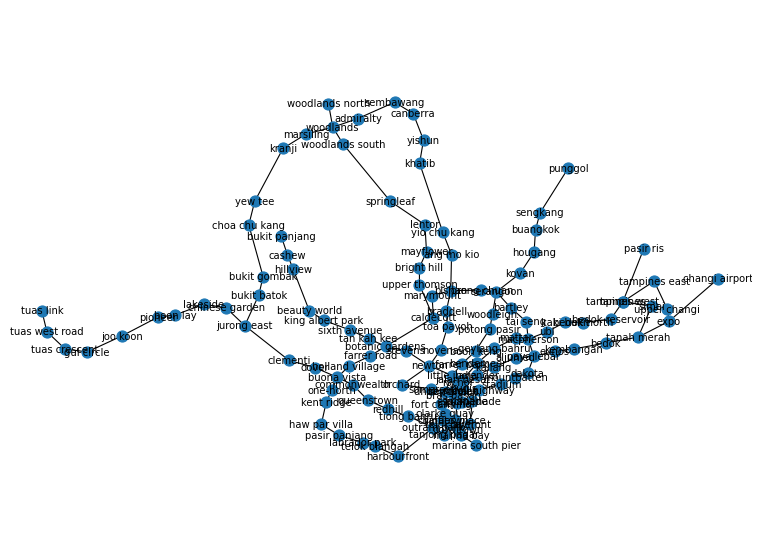

In [14]:
plot_mrt_graph(G_undirected, df_mrt_stations)

The table below shows the top-5 MRT stations with respect to their scores w.r.t to most of the measures we talked about. Note that we don't care about the exact scores, but just about the ranking these scores induce.


| Rank  | Degree | Closeness | Betweenness |
| ---  | ---       | ---         |  --- |
| 1    | dhoby ghaut |little india |  botanic gardens  |
| 2    | macpherson | botanic gardens | buona vista |
| 3    | little india | newton  | bishan  |
| 4    | buona vista | caldecott | serangoon |
| 5    | chinatown | stevens | caldecott |


In [17]:
import networkx as nx
G = G_undirected

scores = nx.centrality.degree_centrality(G)
#scores = nx.centrality.closeness_centrality(G)
#scores = nx.centrality.betweenness_centrality(G)
for idx, (station_name, score) in enumerate(sorted(scores.items(), key=lambda kv: kv[1], reverse=True)[:5]):
    print('{}, {:.5f}, {}'.format((idx+1), score, station_name))

1, 0.03968, dhoby ghaut
2, 0.03175, macpherson
3, 0.03175, little india
4, 0.03175, buona vista
5, 0.03175, chinatown


### Girvan-Newman Algorithm

The Girvan-Newman Algorithm finds communities in a graph by assuming a strongly connected graph and then iteratively removing a minimum set of edges until the graph breaks into 2 components. The criteria to remove an edge is based on the Edge Betweenness Centrality; cf. lecture slides. The Edge Betweenness Centrality $c_{B}(e)$ of an Edge $e$ given a Graph $G=(V,E)$ is defined as:

$$c_{B}(e) = \sum_{u,w\in V} \frac{\sigma(v,w|e)}{\sigma(v,w)}$$

where $\sigma(v,w)$ is the number of shortest paths from $v$ to $w$, and $\sigma(v,w|e)$ is the number of shortest paths from $v$ to $w$ going through Edge $e$.

In [22]:
communities = list(nx.community.girvan_newman(G_undirected))

In [45]:
comm_to_show = communities[2]
col_map = {}
for i in range(len(comm_to_show)):
    for mrt in comm_to_show[i]:
        col_map[mrt] = i

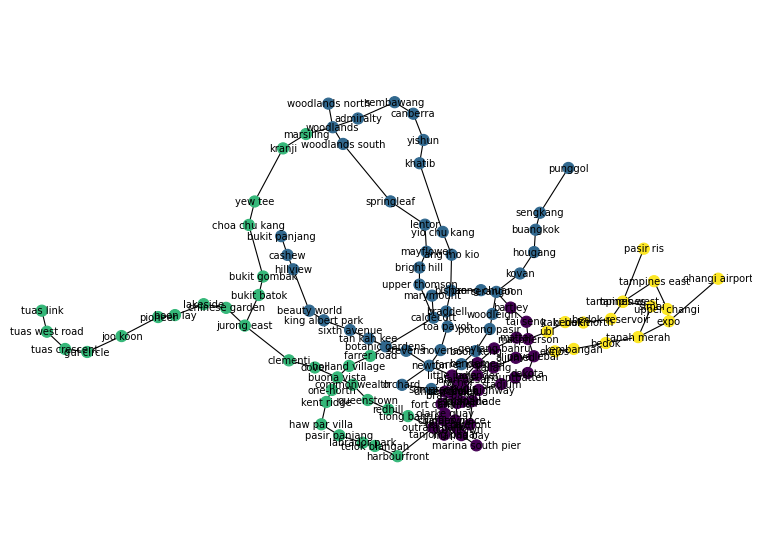

In [55]:
plot_mrt_graph(G_undirected, df_mrt_stations, col=[col_map[v] for v in G_undirected.nodes()])